In [178]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/carprices/carprices.csv
/kaggle/input/encoding/homeprices (2).csv


In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [180]:
df = pd.read_csv("/kaggle/input/encoding/homeprices (2).csv")
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [181]:
df.shape

(13, 3)

In [182]:
df.town.value_counts()

town
monroe township    5
west windsor       4
robinsville        4
Name: count, dtype: int64

## GET DUMMIES METHOD FROM PANDAS

In [183]:
dummies = pd.get_dummies(df.town).astype(int)
dummies.head(10)

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [184]:
merged = pd.concat([ df, dummies], axis = 'columns')
merged.head()

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0


In [185]:
# Lets drop town column

final = merged.drop(['town', 'west windsor'], axis = 1)
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


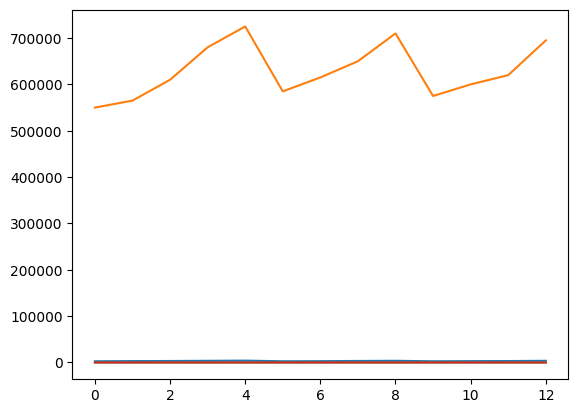

In [186]:
plt.plot(final)

In [187]:
from sklearn import linear_model

model = linear_model.LinearRegression()

In [188]:
X = final.drop(columns = ['price'])
y = final['price']
X.shape, y.shape

((13, 3), (13,))

In [189]:
model.fit(X, y)

LinearRegression()

In [190]:
model.coef_

array([   126.89744141, -40013.97548914, -14327.56396474])

In [191]:
model.intercept_

249790.36766292527

In [192]:
import pickle

with open('model_pickle', 'wb') as f:
    pickle.dump(model, f)

In [193]:
with open('model_pickle', 'rb') as f:
    reg = pickle.load(f)

In [194]:
reg.coef_

array([   126.89744141, -40013.97548914, -14327.56396474])

In [195]:
reg.predict([[2800, 0, 1]])

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [196]:
# to calculate the model

reg.score(X, y) * 100

95.73929037221873

## ONE HOT ENCODING METHOD FROM SKLEARN

In [197]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [198]:
df_le = df
df_le

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [199]:
df_le.town = le.fit_transform(df_le.town)
df_le.town

0     0
1     0
2     0
3     0
4     0
5     2
6     2
7     2
8     2
9     1
10    1
11    1
12    1
Name: town, dtype: int64

In [200]:
df_le

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [201]:
X = df_le.drop(columns = ['price'])
y = df_le['price']

X.shape, y.shape

((13, 2), (13,))

In [202]:
reg.coef_

array([   126.89744141, -40013.97548914, -14327.56396474])

In [203]:
model.coef_

array([   126.89744141, -40013.97548914, -14327.56396474])

In [204]:
model.fit(X, y)

LinearRegression()

In [205]:
model.coef_

array([20112.74367181,   126.05469887])

In [206]:
model.predict([[2, 3300]])

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([670283.67762584])

In [207]:
X = df_le[['town', 'area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [208]:
y = df_le.price

In [209]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

In [210]:
X = ohe.fit_transform(X[:, 0:1]).toarray()
X

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [211]:
X = X[:, 1:]
X

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [212]:
model.fit(X, y)

LinearRegression()

In [213]:
model.coef_

array([-3500., 14000.])

## EXERCISE

In [214]:
df = pd.read_csv("/kaggle/input/carprices/carprices.csv")
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [215]:
df['Car Model'].value_counts()

Car Model
BMW X5                   5
Audi A5                  4
Mercedez Benz C class    4
Name: count, dtype: int64

## GET DUMMIES FUNCTION

In [216]:
dummies = pd.get_dummies(df['Car Model']).astype(int)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [217]:
df = df.drop(columns = ['Car Model'])

final = pd.concat([df, dummies], axis = 1)
final.head(4)

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0


In [218]:
X = final.drop(columns = ['Sell Price($)'])
y = final['Sell Price($)']

X.shape, y.shape

((13, 5), (13,))

In [219]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [220]:
X

,Mileage,Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,6,0,1,0
1,35000,3,0,1,0
2,57000,5,0,1,0
3,22500,2,0,1,0
4,46000,4,0,1,0
5,59000,5,1,0,0
6,52000,5,1,0,0
7,72000,6,1,0,0
8,91000,8,1,0,0
9,67000,6,0,0,1


In [221]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [222]:
model.coef_, model.intercept_

(array([-3.70122094e-01, -1.33245363e+03,  6.10375284e+02, -3.67429130e+03,
         3.06391602e+03]),
 55912.70994756205)

In [223]:
model.predict([[6900, 6, 0,1 ,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41689.85442592])

In [224]:
model.predict([[7900, 7, 0, 0 ,1]])

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([46725.48602958])

In [225]:
model.score(X, y)

0.9417050937281082

In [226]:
import pickle

with open('model_name_for_pickle', 'wb') as f:
    pickle.dump(model, f)

In [227]:
with open('model_name_for_pickle', 'rb') as f:
    reg = pickle.load(f)

## ONE-HOT ENCODING

In [228]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [229]:
df = pd.read_csv("/kaggle/input/carprices/carprices.csv")
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [230]:
df['Car Model'] = le.fit_transform(df['Car Model'])

df['Car Model']

0     1
1     1
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     2
10    2
11    2
12    2
Name: Car Model, dtype: int64

In [231]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [232]:
X = df[['Car Model','Mileage', 'Age(yrs)']].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]])

In [233]:
y = df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [234]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
X = ohe.fit_transform(X)
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 39 stored elements and shape (13, 22)>

In [235]:
model.coef_

array([-3.70122094e-01, -1.33245363e+03,  6.10375284e+02, -3.67429130e+03,
        3.06391602e+03])

In [236]:
model.fit(X, y)

LinearRegression()

In [237]:
model.score(X, y)

1.0